In [265]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import splprep, splrep, splev, UnivariateSpline, LSQUnivariateSpline, CubicSpline, BSpline, InterpolatedUnivariateSpline, make_interp_spline, make_lsq_spline

In [295]:
#[-2.09, 1.04]

x_old = np.array([150,150,151,151,152,153,153,153,153,154,154,154,154,155,155,155,156,156
,156,156,157,157,157,157,158,158,158,159,159,159,160,160,160,160,161,161
,161,162,162,162,162,163,163,163,163,164,164,164,165,165,165,166,166,166
,166,167,167,167,168,168,168,168,169,169,169,169,169,169,170,170,170,170])
y_old = np.array([149,150,147,148,146,79,80,144,145,81,82,142,143,83,84,141,85,86
,139,140,87,88,137,138,89,90,136,91,134,135,92,93,132,133,94,95
,131,96,97,129,130,98,99,127,128,100,101,126,102,124,125,103,104,122
,123,105,106,121,107,108,119,120,109,110,115,116,117,118,111,112,113,114])

In [291]:
x = np.array([150,150,151,151,152,153,153,153,153,154,154,154,154,155,155,155,156,156
,156,156,157,157,157,157,158,158,158,159,159,159,160,160,160,160,161,161
,161,162,162,162,162,163,163,163,163,164,164,164,165,165,165,166,166,166
,166,167,167,167,168,168,168,168,169,169,169,169,169,169,170,170,170,170])
x = x.astype(float)
px = x

In [292]:
#x = x_old[-1]
print(x)
print(px)
print(len(x))
print(len(px))


[150. 150. 151. 151. 152. 153. 153. 153. 153. 154. 154. 154. 154. 155.
 155. 155. 156. 156. 156. 156. 157. 157. 157. 157. 158. 158. 158. 159.
 159. 159. 160. 160. 160. 160. 161. 161. 161. 162. 162. 162. 162. 163.
 163. 163. 163. 164. 164. 164. 165. 165. 165. 166. 166. 166. 166. 167.
 167. 167. 168. 168. 168. 168. 169. 169. 169. 169. 169. 169. 170. 170.
 170. 170.]
[150. 150. 151. 151. 152. 153. 153. 153. 153. 154. 154. 154. 154. 155.
 155. 155. 156. 156. 156. 156. 157. 157. 157. 157. 158. 158. 158. 159.
 159. 159. 160. 160. 160. 160. 161. 161. 161. 162. 162. 162. 162. 163.
 163. 163. 163. 164. 164. 164. 165. 165. 165. 166. 166. 166. 166. 167.
 167. 167. 168. 168. 168. 168. 169. 169. 169. 169. 169. 169. 170. 170.
 170. 170.]
72
72


In [294]:
for i in range(len(x)-1):
    if x[i] == x[i+1]:
        print(i)
        print(px[i])
        px[i+1] = px[i] + 0.1*i
        print(px[i+1])
    else:
        "Do Nothing"
print(px)

0
150.0
150.0
[150.  150.  151.  151.2 152.  153.  153.5 153.  153.7 154.  154.9 154.
 155.1 155.  156.3 155.  156.  157.6 156.  157.8 157.  159.  157.  159.2
 158.  160.4 158.  159.  161.7 159.  160.  163.  160.  163.2 161.  164.4
 161.  162.  165.7 162.  165.9 163.  167.1 163.  167.3 164.  168.5 164.
 165.  169.8 165.  166.  171.1 166.  171.3 167.  172.5 167.  168.  173.8
 168.  174.  169.  175.2 169.  175.4 169.  175.6 170.  176.8 170.  177. ]


In [280]:
'''print(len(x_old))
print(len(y_old))
x_unique = np.unique(x_old)
print(len(x_unique))'''

'print(len(x_old))\nprint(len(y_old))\nx_unique = np.unique(x_old)\nprint(len(x_unique))'

In [281]:
points = np.c_[px,y_old]    
final_ordered = np.flip(points, 0)

In [282]:
#st_pt = final_ordered[0]
#end_pt = final_ordered[-1]
#final_ordered = np.linspace(st_pt, end_pt, 50)
x = final_ordered[:,0]
y = final_ordered[:,1]
print(x)
print(y)
#order = np.argsort(x)
#xsort, ysort = x[order], y[order]
#print(xsort)
#print(np.sort(x))
print(ysort)
xsort = np.sort(x)
ysort = np.sort(y)

[177.  170.  176.8 170.  175.6 169.  175.4 169.  175.2 169.  174.  168.
 173.8 168.  167.  172.5 167.  171.3 166.  171.1 166.  165.  169.8 165.
 164.  168.5 164.  167.3 163.  167.1 163.  165.9 162.  165.7 162.  161.
 164.4 161.  163.2 160.  163.  160.  159.  161.7 159.  158.  160.4 158.
 159.2 157.  159.  157.  157.8 156.  157.6 156.  155.  156.3 155.  155.1
 154.  154.9 154.  153.7 153.  153.5 153.  152.  151.2 151.  150.1 150. ]
[114. 113. 112. 111. 118. 117. 116. 115. 110. 109. 120. 119. 108. 107.
 121. 106. 105. 123. 122. 104. 103. 125. 124. 102. 126. 101. 100. 128.
 127.  99.  98. 130. 129.  97.  96. 131.  95.  94. 133. 132.  93.  92.
 135. 134.  91. 136.  90.  89. 138. 137.  88.  87. 140. 139.  86.  85.
 141.  84.  83. 143. 142.  82.  81. 145. 144.  80.  79. 146. 148. 147.
 150. 149.]
[ 79.  80.  81.  82.  83.  84.  85.  86.  87.  88.  89.  90.  91.  92.
  93.  94.  95.  96.  97.  98.  99. 100. 101. 102. 103. 104. 105. 106.
 107. 108. 109. 110. 111. 112. 113. 114. 115. 116. 117. 

In [296]:
spl = splrep(x_old,y_old)
#print(tck)
#xsort = np.line
print(spl)

(array([150., 150., 150., 150., 151., 151., 152., 153., 153., 153., 153.,
       154., 154., 154., 154., 155., 155., 155., 156., 156., 156., 156.,
       157., 157., 157., 157., 158., 158., 158., 159., 159., 159., 160.,
       160., 160., 160., 161., 161., 161., 162., 162., 162., 162., 163.,
       163., 163., 163., 164., 164., 164., 165., 165., 165., 166., 166.,
       166., 166., 167., 167., 167., 168., 168., 168., 168., 169., 169.,
       169., 169., 169., 169., 170., 170., 170., 170., 170., 170.]), array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan,  0.,  0.,  0.,  0.]), 3)


In [284]:
print(spl[0])

[150.  150.  150.  150.  151.  151.2 152.  153.  153.  153.5 153.7 154.
 154.  154.9 155.  155.  155.1 156.  156.  156.3 157.  157.  157.6 157.8
 158.  158.  159.  159.  159.  159.2 160.  160.  160.4 161.  161.  161.7
 162.  162.  163.  163.  163.  163.2 164.  164.  164.4 165.  165.  165.7
 165.9 166.  166.  167.  167.  167.1 167.3 168.  168.  168.5 169.  169.
 169.  169.8 170.  170.  171.1 171.3 172.5 173.8 174.  175.2 175.4 175.6
 177.  177.  177.  177. ]


In [285]:
print(xsort)
t = spl[0]

spline = make_lsq_spline(xsort, ysort, t, k=3)


[150.  150.1 151.  151.2 152.  153.  153.  153.5 153.7 154.  154.  154.9
 155.  155.  155.1 156.  156.  156.3 157.  157.  157.6 157.8 158.  158.
 159.  159.  159.  159.2 160.  160.  160.4 161.  161.  161.7 162.  162.
 163.  163.  163.  163.2 164.  164.  164.4 165.  165.  165.7 165.9 166.
 166.  167.  167.  167.1 167.3 168.  168.  168.5 169.  169.  169.  169.8
 170.  170.  171.1 171.3 172.5 173.8 174.  175.2 175.4 175.6 176.8 177. ]


ValueError: Expect x to be a 1-D sorted array_like.

In [243]:
newX = xsort
newY = spline(xsort)

<ipython-input-244-58526d103e00>:5: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


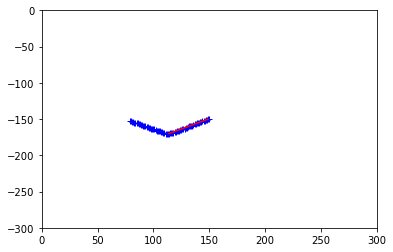

In [244]:
fig = None
if fig == None:
       fig = plt.figure()
       ax = fig.add_subplot(111)
       fig.show()
       fig.canvas.draw()
ax.clear()
ax.set_xlim([0, 300])
ax.set_ylim([-300, 0])
ax.plot(y_old, -x_old, 'b+', label='Data')
ax.plot(newY, -newX, 'r-', label='Spline, fit')
fig.canvas.draw()
fig.canvas.flush_events() 
    #End Plotting

In [102]:
x = [0, 1, 2, 3, 4, 5]

In [103]:
x[1] = x[1] + 0.1
print(x[1])

1.1
